In [123]:
import pandas as pd
df=pd.read_csv('/content/adult.csv')

#About Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

#Fields
The dataset contains 16 columns

Target filed: Income
-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [124]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [125]:
df.shape

(32561, 15)

In [126]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [128]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**-> There are no Null values in the dataset**

**-> But some special character ( ? ) is present so we'll have to get rid of that.**

In [129]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [130]:
df['occupation'].value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [131]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

#Imputation
we have to replace (?) for proper analysis.

In [132]:
df.workclass.replace('?',df['workclass'].mode()[0],inplace=True)
df.occupation.replace('?',df['occupation'].mode()[0],inplace=True)
df['native.country'].replace('?',df['native.country'].mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [133]:
df.groupby('income')['capital.loss'].count()

income
<=50K    24720
>50K      7841
Name: capital.loss, dtype: int64

Text(0.5, 1.0, 'Income less than 50,000')

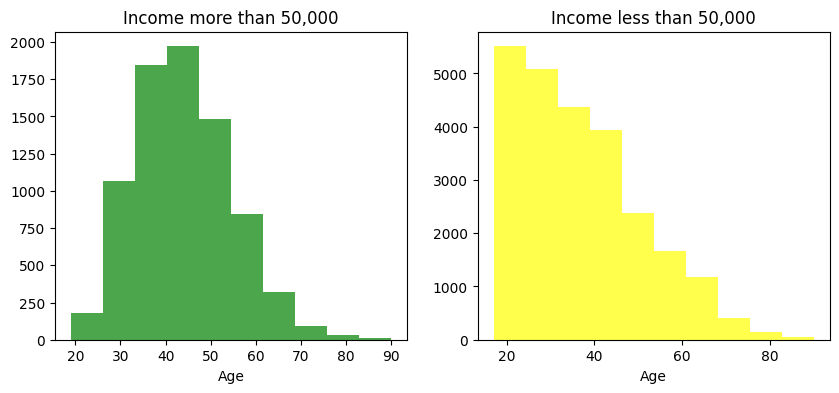

In [134]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1, 2, figsize=(10,4))

axis[0].hist(df[df['income'] == '>50K']['age'], bins=10,color='green', alpha=0.7)
axis[0].set_xlabel('Age')
axis[0].set_title('Income more than 50,000')

axis[1].hist(df[df['income'] == '<=50K']['age'], bins=10,color='yellow', alpha=0.7)
axis[1].set_xlabel('Age')
axis[1].set_title('Income less than 50,000')

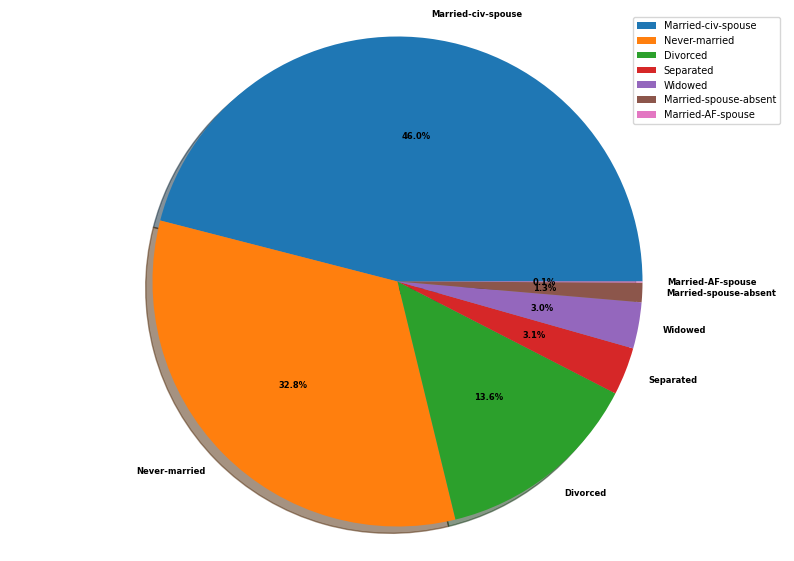

In [135]:
marial_status = df['marital.status'].value_counts()
plt.figure(figsize=(10, 7))

plt.style.use('default')
plt.pie(marial_status,labels=marial_status.index,autopct='%1.1f%%',shadow=True,textprops = {'fontsize': 6,'weight': 'bold'}
);
plt.legend(loc="center left")
plt.legend(prop={'size': 7})

plt.axis('equal')  ;

<Axes: xlabel='income', ylabel='education.num'>

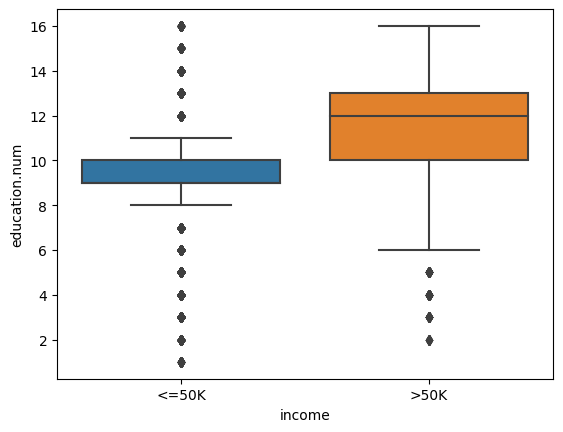

In [136]:
import seaborn as sns
sns.boxplot(data=df, y='education.num', x='income')

In [137]:
Q1 = df['education.num'].quantile(0.25)
Q3 = df['education.num'].quantile(0.75)

IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR


In [138]:
df = df[ (df['education.num']>lower_whisker) & (df['education.num']<upper_whisker) ]

<Axes: xlabel='income', ylabel='education.num'>

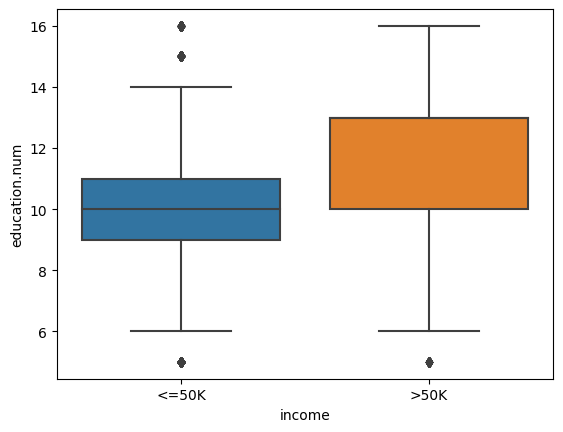

In [139]:
import seaborn as sns
sns.boxplot(data=df, y='education.num', x='income')

In [140]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
15      576
5       514
8       433
16      413
Name: education.num, dtype: int64

<Axes: >

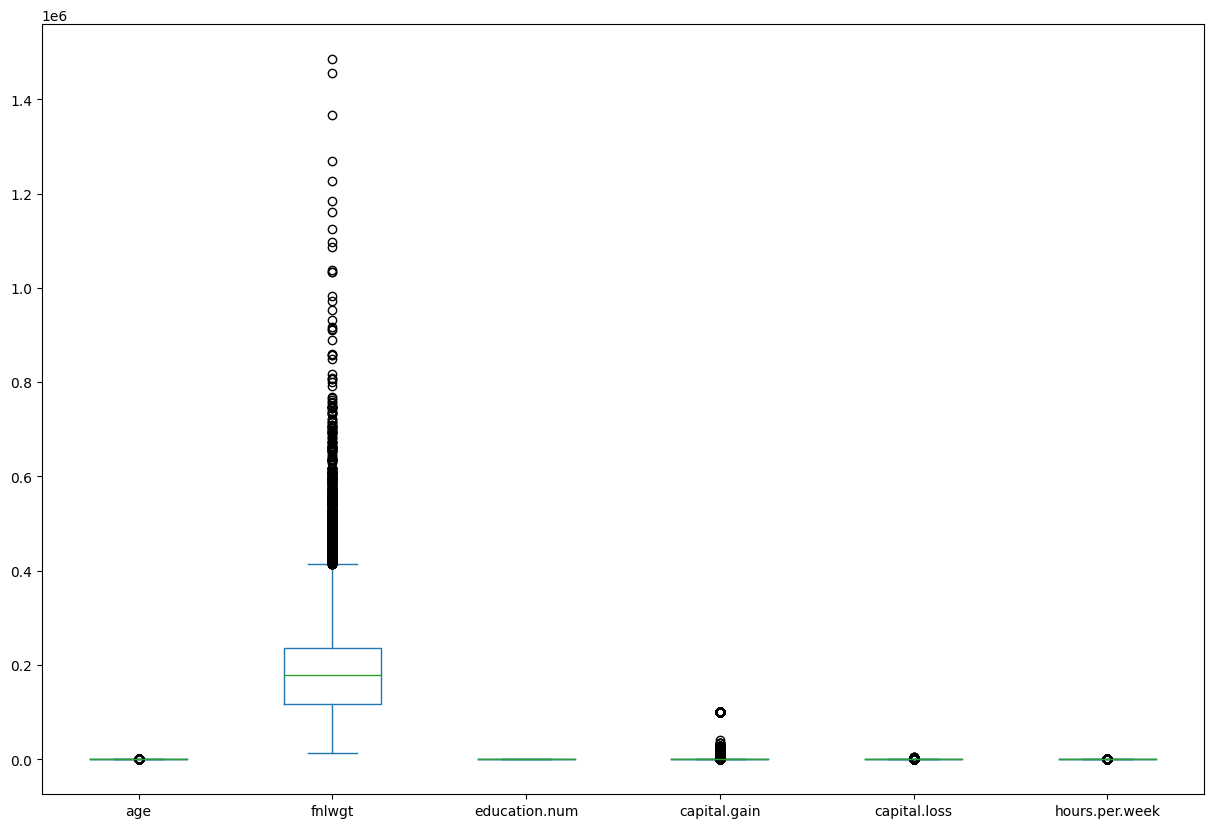

In [141]:
df.plot(kind='box', layout=(3,3), figsize=(15,10))

In [142]:
max_cap =df['capital.gain'].quantile(0.995)
max_cap

99999.0

In [143]:
df=df[df['capital.gain'] < max_cap]

<Axes: >

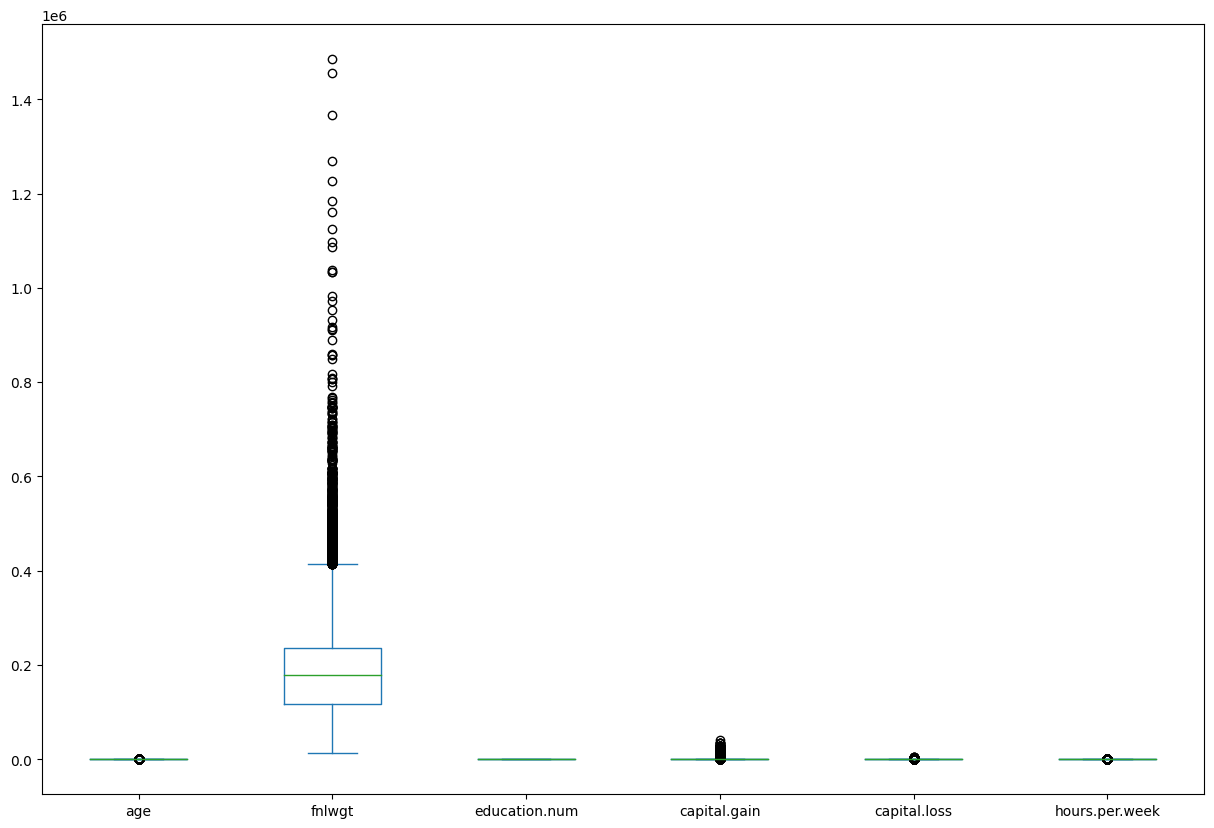

In [144]:
df.plot(kind='box', layout=(3,3), figsize=(15,10))

In [145]:
df.groupby('sex').income.value_counts()

sex     income
Female  <=50K      9289
        >50K       1154
Male    <=50K     14295
        >50K       6466
Name: income, dtype: int64

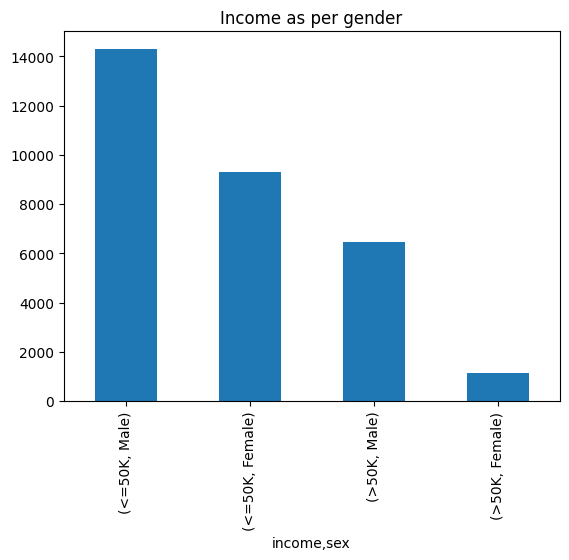

In [146]:
import matplotlib.pyplot as plt
df.groupby('income').sex.value_counts().plot.bar()
plt.title('Income as per gender')
plt.show()

In [147]:
df.groupby('income').occupation.value_counts()

income  occupation       
<=50K   Prof-specialty       3802
        Adm-clerical         3245
        Craft-repair         2997
        Other-service        2942
        Sales                2625
        Exec-managerial      2083
        Machine-op-inspct    1579
        Transport-moving     1190
        Handlers-cleaners    1182
        Farming-fishing       752
        Tech-support          639
        Protective-serv       427
        Priv-house-serv       113
        Armed-Forces            8
>50K    Prof-specialty       1975
        Exec-managerial      1917
        Sales                 951
        Craft-repair          908
        Adm-clerical          500
        Transport-moving      310
        Tech-support          282
        Machine-op-inspct     239
        Protective-serv       210
        Other-service         134
        Farming-fishing       109
        Handlers-cleaners      83
        Armed-Forces            1
        Priv-house-serv         1
Name: occupation, dtyp

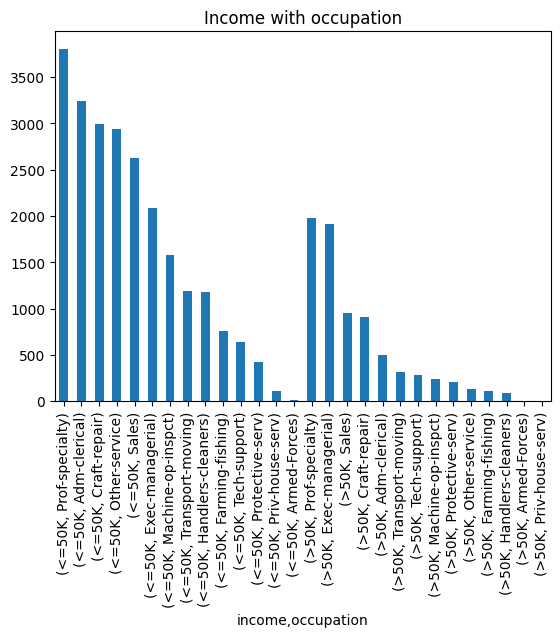

In [148]:
df.groupby('income').occupation.value_counts().plot.bar()
plt.title('Income with occupation')
plt.show()

-> Converting categorical values of target column to numerical for checking corelation of independent column with target column.

In [149]:
df['income']=df['income'].apply(lambda x: 1 if x == '>50K' else 0)

<ipython-input-149-01f1311417d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income']=df['income'].apply(lambda x: 1 if x == '>50K' else 0)


<ipython-input-150-828b6392ba0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

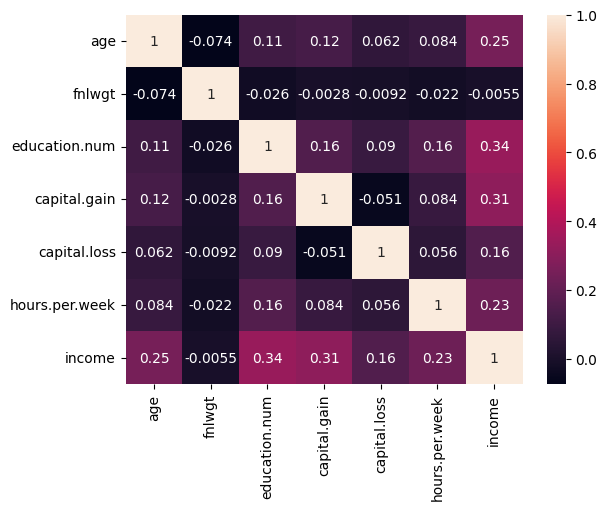

In [150]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [151]:
df=df.drop(['fnlwgt'] , axis = 1)

**-> Spliting dataset into X and Y for training and testing of model**

In [152]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [153]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

# Feature engineering
# handle cantegorical features

In [154]:
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,8,9,6,9,1,4,0,0,4356,40,38
1,82,3,8,9,6,3,1,4,0,0,4356,18,38
2,66,3,11,10,6,9,4,2,0,0,4356,40,38
4,41,3,11,10,5,9,3,4,0,0,3900,40,38
5,34,3,8,9,0,7,4,4,0,0,3770,45,38


In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=45)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [157]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :- 	 Accuracy = 0.80
GaussianNB() :- 	 Accuracy = 0.81
DecisionTreeClassifier() :- 	 Accuracy = 0.81
RandomForestClassifier() :- 	 Accuracy = 0.85
KNeighborsClassifier() :- 	 Accuracy = 0.83


In [158]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [159]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5898
           1       0.71      0.61      0.66      1903

    accuracy                           0.84      7801
   macro avg       0.80      0.77      0.78      7801
weighted avg       0.84      0.84      0.84      7801



In [160]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5420,  478],
       [ 734, 1169]])

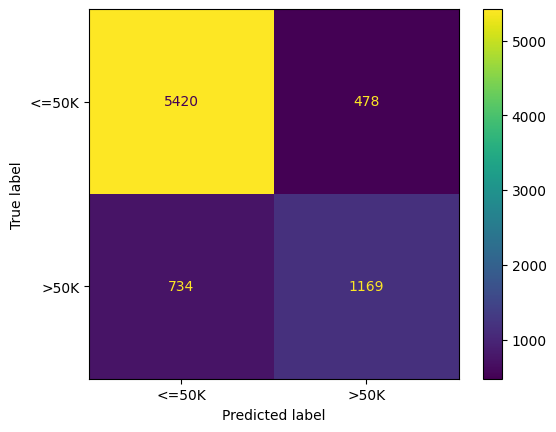

In [161]:
ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K']).plot()

**With the above analysis we came to know that salary of an adult depends upon his education.num, capital.gain and to some extent on age, hours.per.week**